[ 2.46607177 -3.52487808  2.59253371 -1.08576365]


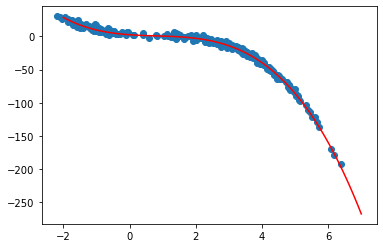

In [15]:
import numpy as np;
import matplotlib.pyplot as plt; 

N=100
a = -1 
b = 2,
c = -3
d = 4

disturbo = np.random.normal(loc=0, scale=2.5, size= N*3)

X1_1= np.random.normal(loc=-1,scale=0.5 ,size= N) 
X1_2= np.random.normal(loc=2.5,scale=1 ,size= N) 
X1_3= np.random.normal(loc=4,scale=1 ,size= N) 

X1 = np.concatenate([X1_1,X1_2,X1_3])

X0 = np.ones(N*3)
X_cub = np.stack([X0,X1,X1**2,X1**3],axis=1)

Y = a* X1**3 + b* X1**2 + c* X1 + d + disturbo

wc = np.random.uniform(low= -1, high=1, size=4)

plt.scatter(X1,Y)
#parametri 
mini_batch_size=10
eta = 10e-7
max_epoch = 10000

total_error=np.zeros(max_epoch+1)
errors_epoch = np.zeros(max_epoch+1)

def error_w (X,y,w):
    error = np.sum(np.square(y-np.dot(X,w))) / 2.0
    return error

for epoch in range(max_epoch):

    perm = np.random.permutation(range(Y.shape[0]))
    X_cub= X_cub[perm]
    Y = Y[perm]
    for j in range(0,N*3,mini_batch_size):
        X_batch = X_cub[j:(j+mini_batch_size),:]
        y_batch = Y[j:(j+mini_batch_size)]
        prod= np.dot(X_batch,wc)
        errore = y_batch - prod
        wc = wc + eta* np.dot(X_batch.T,errore)


print(wc)
x_grid = np.linspace(-2, 7, 100) 
# plot line
#

f= wc[0] + x_grid * wc[1] + x_grid**2 * wc[2]+ x_grid**3 * wc[3]
plt.plot(x_grid,f,'red')


